**Creating Average Yards Over Expected(YOE) and using it to look at how good each offense is**

For this project I am using the nflfastr dataset and using down, yardline, yards to go, time remaining, and score differential as features for this model. We will create a data point called Yards Over Expected by predicting the amount of yards a team would get based on those features using a simple Deep Learning model. We will use this data point to compare it with the amount of yards gained, creating a final point of Yards Over Expected. This will show how good an offense is compared to league average. I am using data from the past 3 years to train this model. 

*The article corresponding to this code can be found on my Medium at https://nishank-r.medium.com/creating-yards-over-expected-and-using-it-to-measure-offenses-in-the-nfl-64b12faada41. Please take some time to read it as it will make more sense of the code and the purpose behind this project*

**The article mentioned above was written after week 8 of the NFL Season. This notebook will keep updating over time meaning that the results in this notebook will not completely correspond with the article, but there will obviously be continuation as it continues to proess data from the season**


In [ ]:
import pandas as pd

In [ ]:
YEAR = 2021

In [ ]:
data1 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

In [ ]:
data1.shape

(42795, 372)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, Normalization

In [ ]:
df_features = data1[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'yards_gained', 'score_differential_post', 'ydstogo']]

In [ ]:
df_features.head()

,posteam,game_seconds_remaining,down,yardline_100,yards_gained,score_differential_post,ydstogo
0,NaN,3600.0,NaN,NaN,NaN,NaN,0
1,TEN,3600.0,NaN,35.0,0.0,0.0,0
2,TEN,3600.0,1.0,75.0,-3.0,0.0,10
3,TEN,3563.0,2.0,78.0,3.0,0.0,13
4,TEN,3522.0,3.0,75.0,0.0,0.0,10


In [ ]:
x_test = df_features[df_features.down.notnull()]

In [ ]:
x_test = x_test[df_features.yards_gained.notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
y_test = x_test['yards_gained']

In [ ]:
x_test = x_test[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']]

In [ ]:
y_test

2        -3.0
3         3.0
4         0.0
5         0.0
6        38.0
         ... 
42786    13.0
42789     1.0
42791     8.0
42792     2.0
42793    -2.0
Name: yards_gained, Length: 35353, dtype: float64

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test

,yards_gained
2,-3.0
3,3.0
4,0.0
5,0.0
6,38.0
...,...
42786,13.0
42789,1.0
42791,8.0
42792,2.0


In [ ]:
y_test = y_test.values

In [ ]:
y_test

array([[-3.],
       [ 3.],
       [ 0.],
       ...,
       [ 8.],
       [ 2.],
       [-2.]])

In [ ]:
YEARS = [2018,2019,2020]
data = pd.DataFrame()
for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)

In [ ]:
data.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,away_coach,away_score,away_team,away_timeouts_remaining,away_wp,away_wp_post,blocked_player_id,blocked_player_name,comp_air_epa,comp_air_wpa,comp_yac_epa,comp_yac_wpa,complete_pass,cp,cpoe,def_wp,defensive_extra_point_attempt,defensive_extra_point_conv,defensive_two_point_attempt,defensive_two_point_conv,defteam,defteam_score,defteam_score_post,...,total_home_comp_yac_wpa,total_home_epa,total_home_pass_epa,total_home_pass_wpa,total_home_raw_air_epa,total_home_raw_air_wpa,total_home_raw_yac_epa,total_home_raw_yac_wpa,total_home_rush_epa,total_home_rush_wpa,total_home_score,total_line,touchback,touchdown,two_point_attempt,two_point_conv_result,two_point_conversion_prob,vegas_home_wp,vegas_home_wpa,vegas_wp,vegas_wpa,weather,week,wind,wp,wpa,xpass,xyac_epa,xyac_fd,xyac_mean_yardage,xyac_median_yardage,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,0,NaN,NaN,NaN,0.0,0.512549,0.000000,0.487451,-0.000000,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,PHI 35
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,0.433208,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.566792,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,1,0.0,0.0,NaN,0.0,0.512549,0.000000,0.487451,-0.000000,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,0.0,73.0,0,PHI 35
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,0.410890,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.566792,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,0.000000,0.773778,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,0,0.0,0.0,NaN,0.0,0.512549,0.035972,0.487451,-0.035972,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.022318,0.479781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,0.0,73.0,10,ATL 25
3,0,0.321212,0.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.410890,0.420756,NaN,NaN,0.321212,0.0,0.528906,0.009866,1.0,0.713305,28.669465,0.589110,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,-0.009866,-0.076340,-0.850118,-0.009866,-0.321212,0.0,-0.528906,-0.009866,0.000000,0.000000,0,44.5,0,0.0,0.0,NaN,0.0,0.548521,-0.019719,0.451479,0.019719,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.410890,0.009866,0.587117,0.564953,0.147457,3.515878,2.0,0.998706,0.528906,0.009866,80.0,2.0,10.0,73.0,15,ATL 20
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.420756,0.454899,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.579244,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,-0.009866,-1.082063,-0.850118,-0.009866,-0.321212,0.0,-0.528906,-0.009866,-1.005722,-0.034143,0,44.5,0,0.0,0.0,NaN,0.0,0.528802,-0.038261,0.471198,0.038261,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.420756,0.034143,0.498259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,11.0,73.0,5,ATL 30


In [ ]:
x_train_feats = data[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'yards_gained', 'ydstogo', 'score_differential_post']]

In [ ]:
x_train_feats = x_train_feats[x_train_feats.down.notnull()]

In [ ]:
x_train_feats = x_train_feats[x_train_feats.yards_gained.notnull()]

In [ ]:
x_train_feats.shape

(119068, 7)

In [ ]:
x_train_feats

,posteam,game_seconds_remaining,down,yardline_100,yards_gained,ydstogo,score_differential_post
2,ATL,3600.0,1.0,75.0,0.0,10,0.0
3,ATL,3600.0,1.0,80.0,10.0,15,0.0
4,ATL,3562.0,2.0,70.0,11.0,5,0.0
5,ATL,3526.0,1.0,59.0,20.0,10,0.0
6,ATL,3490.0,1.0,39.0,0.0,10,0.0
...,...,...,...,...,...,...,...
48508,KC,120.0,1.0,14.0,4.0,10,-22.0
48509,KC,100.0,2.0,10.0,0.0,6,-22.0
48510,TB,93.0,1.0,80.0,-1.0,10,22.0
48511,TB,50.0,2.0,81.0,0.0,11,22.0


In [ ]:
y_train = x_train_feats[['yards_gained']]

In [ ]:
y_train

,yards_gained
2,0.0
3,10.0
4,11.0
5,20.0
6,0.0
...,...
48508,4.0
48509,0.0
48510,-1.0
48511,0.0


In [ ]:
y_train = y_train.values

In [ ]:
y_train

array([[ 0.],
       [10.],
       [11.],
       ...,
       [-1.],
       [ 0.],
       [-1.]])

In [ ]:
x_train = x_train_feats[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']]

In [ ]:
x_final_train = x_train[['game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']].values

In [ ]:
x_final_test = x_test[['game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']].values

In [ ]:
x_final_train.shape

(119068, 5)

In [ ]:
x_final_train

array([[3.600e+03, 1.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       [3.600e+03, 1.000e+00, 8.000e+01, 0.000e+00, 1.500e+01],
       [3.562e+03, 2.000e+00, 7.000e+01, 0.000e+00, 5.000e+00],
       ...,
       [9.300e+01, 1.000e+00, 8.000e+01, 2.200e+01, 1.000e+01],
       [5.000e+01, 2.000e+00, 8.100e+01, 2.200e+01, 1.100e+01],
       [3.000e+01, 3.000e+00, 8.100e+01, 2.200e+01, 1.100e+01]])

In [ ]:
x_train_final = tf.keras.utils.normalize(x_final_train)

In [ ]:
x_train_final

array([[9.99779163e-01, 2.77716434e-04, 2.08287326e-02, 0.00000000e+00,
        2.77716434e-03],
       [9.99744465e-01, 2.77706796e-04, 2.22165437e-02, 0.00000000e+00,
        4.16560194e-03],
       [9.99805816e-01, 5.61373282e-04, 1.96480649e-02, 0.00000000e+00,
        1.40343321e-03],
       ...,
       [7.43785821e-01, 7.99769699e-03, 6.39815760e-01, 1.75949334e-01,
        7.99769699e-02],
       [5.08459970e-01, 2.03383988e-02, 8.23705151e-01, 2.23722387e-01,
        1.11861193e-01],
       [3.33848930e-01, 3.33848930e-02, 9.01392112e-01, 2.44822549e-01,
        1.22411274e-01]])

In [ ]:
x_final_test

array([[3.600e+03, 1.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       [3.563e+03, 2.000e+00, 7.800e+01, 0.000e+00, 1.300e+01],
       [3.522e+03, 3.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       ...,
       [1.200e+02, 2.000e+00, 7.700e+01, 4.200e+01, 9.000e+00],
       [7.600e+01, 3.000e+00, 6.900e+01, 4.200e+01, 1.000e+00],
       [3.600e+01, 1.000e+00, 6.700e+01, 4.200e+01, 1.000e+01]])

In [ ]:
x_test_final = tf.keras.utils.normalize(x_final_test)

In [ ]:
x_test_final

array([[9.99779163e-01, 2.77716434e-04, 2.08287326e-02, 0.00000000e+00,
        2.77716434e-03],
       [9.99753655e-01, 5.61186447e-04, 2.18862714e-02, 0.00000000e+00,
        3.64771190e-03],
       [9.99768954e-01, 8.51591954e-04, 2.12897989e-02, 0.00000000e+00,
        2.83863985e-03],
       ...,
       [8.05786629e-01, 1.34297771e-02, 5.17046420e-01, 2.82025320e-01,
        6.04339972e-02],
       [6.84962707e-01, 2.70380016e-02, 6.21874036e-01, 3.78532022e-01,
        9.01266719e-03],
       [4.11596604e-01, 1.14332390e-02, 7.66027014e-01, 4.80196038e-01,
        1.14332390e-01]])

In [ ]:
x_final_train

array([[3.600e+03, 1.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       [3.600e+03, 1.000e+00, 8.000e+01, 0.000e+00, 1.500e+01],
       [3.562e+03, 2.000e+00, 7.000e+01, 0.000e+00, 5.000e+00],
       ...,
       [9.300e+01, 1.000e+00, 8.000e+01, 2.200e+01, 1.000e+01],
       [5.000e+01, 2.000e+00, 8.100e+01, 2.200e+01, 1.100e+01],
       [3.000e+01, 3.000e+00, 8.100e+01, 2.200e+01, 1.100e+01]])

In [ ]:
y_train

array([[ 0.],
       [10.],
       [11.],
       ...,
       [-1.],
       [ 0.],
       [-1.]])

In [ ]:
x_final_test[0].shape

(5,)

# **Here I'll be training the model, and then running the predictions to create our expected yards stat**

In [ ]:
x_final_train[0]

array([3.6e+03, 1.0e+00, 7.5e+01, 0.0e+00, 1.0e+01])

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = x_final_train[0].shape))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(optimizer = 'rmsprop' , loss = 'mse')
r = model.fit(x_train_final, y_train, batch_size=256, epochs=30)

Epoch 1/30
466/466 [==============================] - 2s 3ms/step - loss: 72.4494
Epoch 2/30
466/466 [==============================] - 2s 4ms/step - loss: 69.8426
Epoch 3/30
466/466 [==============================] - 2s 3ms/step - loss: 69.7368
Epoch 4/30
466/466 [==============================] - 2s 3ms/step - loss: 69.6673
Epoch 5/30
466/466 [==============================] - 2s 3ms/step - loss: 69.6128
Epoch 6/30
466/466 [==============================] - 2s 4ms/step - loss: 69.5718
Epoch 7/30
466/466 [==============================] - 2s 3ms/step - loss: 69.5408
Epoch 8/30
466/466 [==============================] - 2s 3ms/step - loss: 69.4999
Epoch 9/30
466/466 [==============================] - 2s 3ms/step - loss: 69.4686
Epoch 10/30
466/466 [==============================] - 2s 3ms/step - loss: 69.4274
Epoch 11/30
466/466 [==============================] - 2s 3ms/step - loss: 69.3832
Epoch 12/30
466/466 [==============================] - 2s 3ms/step - loss: 69.3391
Epoch 13/30
4

In [ ]:
test_preds = model.predict(x_test_final)

In [ ]:
x_test['Expected_yards'] = test_preds

In [ ]:
x_test

,posteam,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards
2,TEN,3600.0,1.0,75.0,0.0,10,5.541914
3,TEN,3563.0,2.0,78.0,0.0,13,5.531493
4,TEN,3522.0,3.0,75.0,0.0,10,5.486021
5,TEN,3519.0,4.0,75.0,0.0,10,5.452384
6,ARI,3507.0,1.0,61.0,0.0,10,5.387393
...,...,...,...,...,...,...,...
42786,WAS,171.0,2.0,13.0,-43.0,4,2.572393
42789,DAL,161.0,1.0,78.0,42.0,10,2.755395
42791,DAL,120.0,2.0,77.0,42.0,9,1.878487
42792,DAL,76.0,3.0,69.0,42.0,1,1.332241


In [ ]:
x_test['yards_gained'] = y_test

# Over the next few lines I'll be cleaning up the results to make it more graph-friendly

In [ ]:
x_test

,posteam,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained
2,TEN,3600.0,1.0,75.0,0.0,10,5.541914,-3.0
3,TEN,3563.0,2.0,78.0,0.0,13,5.531493,3.0
4,TEN,3522.0,3.0,75.0,0.0,10,5.486021,0.0
5,TEN,3519.0,4.0,75.0,0.0,10,5.452384,0.0
6,ARI,3507.0,1.0,61.0,0.0,10,5.387393,38.0
...,...,...,...,...,...,...,...,...
42786,WAS,171.0,2.0,13.0,-43.0,4,2.572393,13.0
42789,DAL,161.0,1.0,78.0,42.0,10,2.755395,1.0
42791,DAL,120.0,2.0,77.0,42.0,9,1.878487,8.0
42792,DAL,76.0,3.0,69.0,42.0,1,1.332241,2.0


In [ ]:
avg_df = x_test.groupby('posteam').mean()

In [ ]:
avg_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained
posteam,,,,,,,
ARI,1723.320285,1.964413,48.774911,1.948399,8.483986,5.008642,5.024911
ATL,1787.959586,2.019737,51.630639,-3.228383,8.370301,5.116412,4.362782
BAL,1671.328915,1.955261,51.483016,-1.961889,8.642916,5.178987,4.748964
BUF,1737.865843,1.932921,46.503089,3.979700,8.562224,5.014382,5.046778
CAR,1738.234568,2.018519,53.553792,-1.284832,8.731041,5.170343,4.044092
CHI,1708.721296,2.003704,51.123148,-4.955556,8.770370,5.139925,4.277778
CIN,1709.937558,1.968313,51.822926,1.068966,8.347623,5.120285,5.114632
CLE,1747.541353,1.980263,49.778195,0.154135,8.607143,5.100960,4.871241
DAL,1833.590909,1.963636,50.490909,3.276860,8.406612,5.023746,5.076860


In [ ]:
avg_df['yards_over_expected'] = avg_df['yards_gained'].values - avg_df['Expected_yards'].values

In [ ]:
avg_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
ARI,1723.320285,1.964413,48.774911,1.948399,8.483986,5.008642,5.024911,0.016269
ATL,1787.959586,2.019737,51.630639,-3.228383,8.370301,5.116412,4.362782,-0.753630
BAL,1671.328915,1.955261,51.483016,-1.961889,8.642916,5.178987,4.748964,-0.430022
BUF,1737.865843,1.932921,46.503089,3.979700,8.562224,5.014382,5.046778,0.032397
CAR,1738.234568,2.018519,53.553792,-1.284832,8.731041,5.170343,4.044092,-1.126252
CHI,1708.721296,2.003704,51.123148,-4.955556,8.770370,5.139925,4.277778,-0.862148
CIN,1709.937558,1.968313,51.822926,1.068966,8.347623,5.120285,5.114632,-0.005653
CLE,1747.541353,1.980263,49.778195,0.154135,8.607143,5.100960,4.871241,-0.229720
DAL,1833.590909,1.963636,50.490909,3.276860,8.406612,5.023746,5.076860,0.053113


In [ ]:
avg_df.sort_values(by = ['yards_over_expected'])

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
HOU,1759.222326,2.091932,54.897749,-4.187617,8.720450,5.238887,3.894934,-1.343952
CAR,1738.234568,2.018519,53.553792,-1.284832,8.731041,5.170343,4.044092,-1.126252
NYG,1663.029837,2.032550,52.960217,-5.728752,8.707957,5.183140,4.115732,-1.067407
MIA,1759.001744,2.030514,50.462947,-0.518745,8.115955,5.045163,4.067132,-0.978031
JAX,1636.768450,2.011070,54.541513,-9.037823,8.469557,5.236822,4.261993,-0.974829
NO,1738.574057,2.045078,51.631095,-2.390984,8.667893,5.135241,4.165593,-0.969647
PIT,1617.383731,2.030062,51.287356,-6.015031,8.382847,5.132631,4.198055,-0.934576
DET,1682.743659,2.039855,51.804348,-6.076087,8.724638,5.203537,4.278080,-0.925458
CHI,1708.721296,2.003704,51.123148,-4.955556,8.770370,5.139925,4.277778,-0.862148


In [ ]:
final_df = avg_df.sort_values(['yards_over_expected'], ascending=False)

In [ ]:
final_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
LA,1733.741055,1.945386,48.523540,1.594162,8.150659,4.939268,5.354991,0.415723
LAC,1704.960644,1.947227,46.855098,-0.288909,8.159213,5.002414,5.235242,0.232828
TB,1779.132289,1.923412,48.526545,3.813751,8.116623,5.046702,5.243690,0.196988
SF,1727.185009,1.934535,52.100569,1.222011,8.576850,5.078832,5.239089,0.160258
KC,1759.027997,1.886264,48.419073,2.290464,8.498688,5.048584,5.198600,0.150016
DAL,1833.590909,1.963636,50.490909,3.276860,8.406612,5.023746,5.076860,0.053113
PHI,1762.507834,1.954839,47.791705,-0.126267,8.270968,5.003523,5.045161,0.041638
GB,1755.072897,1.946729,47.792523,0.151402,8.333645,4.966857,5.005607,0.038750
BUF,1737.865843,1.932921,46.503089,3.979700,8.562224,5.014382,5.046778,0.032397


In [ ]:
epa_data1 = data1[data1.down.notnull()]
epa_data = epa_data1[epa_data1.yards_gained.notnull()]
epa_data1 = epa_data1.groupby('posteam').mean()
avg_df['mean_epa'] = epa_data1['epa'].values
epa_data1['Expected_yards'] = avg_df['Expected_yards'].values
epa_data1['mean_epa'] = avg_df['mean_epa'].values
epa_data1['yards_over_expected'] = avg_df['yards_over_expected'].values
epa_data1


,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,...,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,Expected_yards,mean_epa,yards_over_expected
posteam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,2169.018601,2.021107e+09,8.271036,48.745793,438.155004,831.954827,1721.591674,0.0,11.305580,0.064659,2.573959,1.969885,0.086802,8.497786,46.767936,5.024911,0.843224,0.329495,0.509317,0.012400,0.000000,0.027458,7.413255,5.577778,45.183099,2.573074,2.341895,0.001779,2.372896,2.542073,9.821966,14.379097,12.782994,11.098317,1.684677,13.088574,11.112489,1.976085,0.127723,0.085550,...,0.514615,0.551816,2.519929,2.610275,-0.194863,2055.687334,2287.996457,26.631532,19.992914,-6.638618,46.624446,2.568202,48.635075,0.360496,NaN,NaN,0.009743,0.456156,3.382060,6.363426,26.885277,0.533215,0.356067,0.287367,0.067316,0.918512,4.692921,0.124889,0.822852,0.038929,0.733523,5.701263,4.017582,0.766962,0.566178,0.596795,0.648662,5.008642,0.034982,0.016269
ATL,2008.081767,2.021107e+09,8.323308,51.630639,431.192669,855.816729,1787.959586,0.0,10.323308,0.051692,2.492481,2.019737,0.054511,8.370301,40.122180,4.362782,0.472744,0.117481,0.528195,0.009398,0.000940,0.013158,6.928433,4.450581,42.629630,2.683271,2.622180,0.001880,2.693609,2.611842,11.270677,10.442669,9.019737,12.448308,-3.428571,9.242481,12.470865,-3.228383,0.123825,0.095441,...,0.428571,0.437030,2.421053,2.574248,0.386278,1896.966165,2117.703947,23.371241,22.623120,-0.748120,45.994361,2.369361,47.517857,0.339286,NaN,NaN,0.005639,0.409774,2.421320,47.890141,29.996212,0.555451,0.320489,0.253759,0.079887,0.909774,19.746781,0.090226,0.543233,-0.073875,0.731324,5.247290,3.395789,0.786333,0.592420,0.641999,-0.662071,5.116412,-0.086128,-0.753630
BAL,2189.243579,2.021108e+09,8.597349,51.483016,411.179785,804.883181,1671.328915,0.0,12.033969,0.058824,2.628003,1.955261,0.046396,8.642916,43.249379,4.748964,0.873239,0.058824,0.545153,0.007457,0.004143,0.057995,8.549451,4.430556,43.556818,2.641259,2.565866,0.000829,2.664457,2.542668,10.592378,10.930406,9.514499,11.727423,-2.212925,9.780447,11.742336,-1.961889,0.150100,0.091220,...,0.438277,0.516984,2.573322,2.691798,-0.223695,2080.666114,2301.446562,22.459818,24.620547,2.160729,47.080365,-0.032726,47.014499,0.331400,NaN,NaN,0.001657,0.463960,7.062409,21.505495,35.258993,0.570837,0.319801,0.291632,0.076222,0.912179,13.197393,0.108534,0.582436,0.029123,0.702095,5.312552,3.293878,0.791957,0.571814,0.648790,-0.568844,5.178987,0.023178,-0.430022
BUF,2132.336851,2.021107e+09,8.484609,46.565523,427.143360,837.961302,1737.169745,0.0,11.838171,0.066843,2.547933,1.932278,0.071240,8.564644,43.910290,5.046778,0.678100,0.122252,0.569041,0.015831,0.000000,0.036060,8.063465,4.218997,38.657143,2.671064,2.517150,0.001765,2.577836,2.610378,9.931398,11.004398,12.158311,8.445031,3.713281,12.485488,8.450308,4.035180,0.136431,0.080672,...,0.533861,0.564644,2.490765,2.598945,-0.596306,2020.699208,2247.766931,24.031662,22.155673,-1.875989,46.187335,2.706684,47.756816,0.320141,NaN,NaN,0.001759,0.467898,16.908957,21.849206,2

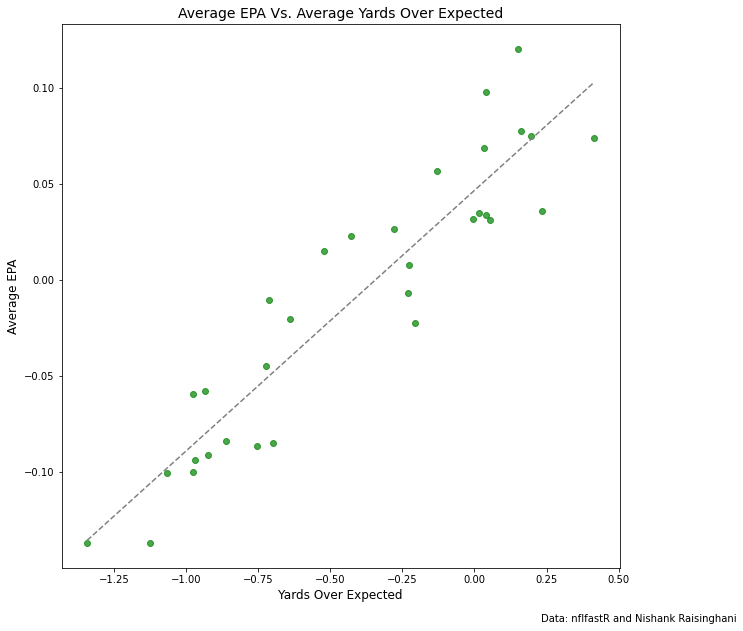

In [ ]:
import matplotlib.pyplot as plt
x = avg_df['yards_over_expected'].values
y = avg_df['mean_epa'].values
plt.figure(figsize=(10,10))


plt.scatter(x, y, alpha=.7, color='green')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
         color='grey', linestyle='--')
plt.xlabel('Yards Over Expected', fontsize=12)
plt.ylabel('Average EPA', fontsize=12)
plt.title('Average EPA Vs. Average Yards Over Expected',fontsize=14)

plt.figtext(.79, .05, 'Data: nflfastR and Nishank Raisinghani', fontsize=10)


plt.savefig('epavsyoe.png', dpi=400)

**We can see here that YOE has a pretty strong correlation to EPA/play proving its value**

In [ ]:
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')

In [ ]:
urls

,team,team_code,url
0,Arizona Cardinals,ARI,https://upload.wikimedia.org/wikipedia/en/thum...
1,Atlanta Falcons,ATL,https://upload.wikimedia.org/wikipedia/en/thum...
2,Baltimore Ravens,BAL,https://upload.wikimedia.org/wikipedia/en/thum...
3,Buffalo Bills,BUF,https://upload.wikimedia.org/wikipedia/en/thum...
4,Carolina Panthers,CAR,https://upload.wikimedia.org/wikipedia/en/thum...
5,Chicago Bears,CHI,https://upload.wikimedia.org/wikipedia/commons...
6,Cincinnati Bengals,CIN,https://upload.wikimedia.org/wikipedia/commons...
7,Cleveland Browns,CLE,https://upload.wikimedia.org/wikipedia/en/thum...
8,Dallas Cowboys,DAL,https://upload.wikimedia.org/wikipedia/commons...
9,Denver Broncos,DEN,https://upload.wikimedia.org/wikipedia/en/thum...


In [ ]:
urls['team_code'].values

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LA', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'LV', 'PHI', 'PIT', 'SF', 'SEA',
       'TB', 'TEN', 'WAS', 'OAK', 'STL', 'SD'], dtype=object)

In [ ]:
logo

['/content/ARI.png',
 '/content/ATL.png',
 '/content/BAL.png',
 '/content/BUF.png',
 '/content/CAR.png',
 '/content/CHI.png',
 '/content/CIN.png',
 '/content/CLE.png',
 '/content/DAL.png',
 '/content/DEN.png',
 '/content/DET.png',
 '/content/GB.png',
 '/content/HOU.png',
 '/content/IND.png',
 '/content/JAX.png',
 '/content/KC.png',
 '/content/LAC.png',
 '/content/LA.png',
 '/content/MIA.png',
 '/content/MIN.png',
 '/content/NE.png',
 '/content/NO.png',
 '/content/NYG.png',
 '/content/NYJ.png',
 '/content/LV.png',
 '/content/PHI.png',
 '/content/PIT.png',
 '/content/SF.png',
 '/content/SEA.png',
 '/content/TB.png',
 '/content/TEN.png',
 '/content/WAS.png',
 '/content/OAK.png',
 '/content/STL.png',
 '/content/SD.png']

In [ ]:
logo.remove('/content/OAK.png')

In [ ]:
logo

['/content/ARI.png',
 '/content/ATL.png',
 '/content/BAL.png',
 '/content/BUF.png',
 '/content/CAR.png',
 '/content/CHI.png',
 '/content/CIN.png',
 '/content/CLE.png',
 '/content/DAL.png',
 '/content/DEN.png',
 '/content/DET.png',
 '/content/GB.png',
 '/content/HOU.png',
 '/content/IND.png',
 '/content/JAX.png',
 '/content/KC.png',
 '/content/LAC.png',
 '/content/LA.png',
 '/content/MIA.png',
 '/content/MIN.png',
 '/content/NE.png',
 '/content/NO.png',
 '/content/NYG.png',
 '/content/NYJ.png',
 '/content/LV.png',
 '/content/PHI.png',
 '/content/PIT.png',
 '/content/SF.png',
 '/content/SEA.png',
 '/content/TB.png',
 '/content/TEN.png',
 '/content/WAS.png']

In [ ]:
epa_data

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,...,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,aborted_play,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,fantasy_player_name,fantasy_player_id,fantasy,fantasy_id,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,TEN,75.0,2021-09-12,900.0,1800.0,3600.0,Half1,0,1.0,0,1,1.0,0,15:00,TEN 25,10,0.0,(15:00) 22-D.Henry left tackle to TEN 22 for -...,run,-3.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,...,grass,NaN,NaN,Mike Vrabel,Kliff Kingsbury,NAS00,Nissan Stadium,0,0.0,NaN,NaN,D.Henry,22.0,NaN,NaN,0,1,0.0,0,1,NaN,00-0032764,NaN,D.Henry,22.0,00-0032764,D.Henry,00-0032764,D.Henry,00-0032764,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,TEN,78.0,2021-09-12,863.0,1763.0,3563.0,Half1,0,1.0,0,1,2.0,0,14:23,TEN 22,13,0.0,(14:23) (Shotgun) 17-R.Tannehill pass short mi...,pass,3.0,1,0,1.0,0,0,0,short,middle,2.0,1.0,...,grass,NaN,NaN,Mike Vrabel,Kliff Kingsbury,NAS00,Nissan Stadium,0,1.0,R.Tannehill,17.0,NaN,NaN,D.Henry,22.0,1,0,0.0,0,1,00-0029701,NaN,00-0032764,R.Tannehill,17.0,00-0029701,D.Henry,00-0032764,D.Henry,00-0032764,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,TEN,75.0,2021-09-12,822.0,1722.0,3522.0,Half1,0,1.0,0,1,3.0,0,13:42,TEN 25,10,0.0,(13:42) (Shotgun) 17-R.Tannehill pass incomple...,pass,0.0,1,0,1.0,0,0,0,short,right,10.0,NaN,...,grass,NaN,NaN,Mike Vrabel,Kliff Kingsbury,NAS00,Nissan Stadium,0,0.0,R.Tannehill,17.0,NaN,NaN,C.Rogers,80.0,1,0,0.0,0,1,00-0029701,NaN,00-0032355,R.Tannehill,17.0,00-0029701,C.Rogers,00-0032355,C.Rogers,00-0032355,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
5,122,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,TEN,75.0,2021-09-12,819.0,1719.0,3519.0,Half1,0,1.0,0,1,4.0,0,13:39,TEN 25,10,0.0,"(13:39) 6-B.Kern punts 47 yards to ARI 28, Cen...",punt,0.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,...,grass,NaN,NaN,Mike Vrabel,Kliff Kingsbury,NAS00,Nissan Stadium,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,-0.345293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,ARI,61.0,2021-09-12,807.0,1707.0,3507.0,Half1,0,2.0,0,1,1.0,0,13:27,ARI 39,10,45.0,(13:27) (Shotgun) 1-K.Murray pass deep left to...,pass,38.0,1,0,1.0,0,0,0,deep,left,29.0,9.0,...,grass,NaN,NaN,Mike Vrabel,Kliff Kingsbury,NAS00,Nissan Stadium,0,1.0,K.Murray,1.0,NaN,NaN,D.Hopkins,10.0,1,0,1.0,0,1,00-0035228,NaN,00-0030564,K.Murray,1.0,00-0035228,D.Hopkins,00-0030564,D.Hopkins,00-0030564,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42786,3911,2021_16_WAS_DAL,2021122611,DAL,WAS,REG,16,WAS,away,DAL,DAL,13.0,2021-12-26,171.0,171.0,171.0,Half2,0,23.0,1,4,2.0,0,02:51,DAL 13,4,61.0,"(2:51) (No Huddle, Shotgun) 8-K.Allen pass sho...",pass,13.0,1,1,1.0,0,0,0,short,right,6.0,7.0,...,fieldturf,NaN,NaN,Mike McCarthy,Ron Rivera,DAL00,AT&T Stadium,0,1.0,K.Allen,8.0,NaN,

In [ ]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [ ]:
epa_data1.sort_values('posteam',ascending=True)
epa_data1['color'] = COLORS.values()


epa_data1

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,...,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,Expected_yards,mean_epa,yards_over_expected,color
posteam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,2169.018601,2.021107e+09,8.271036,48.745793,438.155004,831.954827,1721.591674,0.0,11.305580,0.064659,2.573959,1.969885,0.086802,8.497786,46.767936,5.024911,0.843224,0.329495,0.509317,0.012400,0.000000,0.027458,7.413255,5.577778,45.183099,2.573074,2.341895,0.001779,2.372896,2.542073,9.821966,14.379097,12.782994,11.098317,1.684677,13.088574,11.112489,1.976085,0.127723,0.085550,...,0.551816,2.519929,2.610275,-0.194863,2055.687334,2287.996457,26.631532,19.992914,-6.638618,46.624446,2.568202,48.635075,0.360496,NaN,NaN,0.009743,0.456156,3.382060,6.363426,26.885277,0.533215,0.356067,0.287367,0.067316,0.918512,4.692921,0.124889,0.822852,0.038929,0.733523,5.701263,4.017582,0.766962,0.566178,0.596795,0.648662,5.008642,0.034982,0.016269,#97233F
ATL,2008.081767,2.021107e+09,8.323308,51.630639,431.192669,855.816729,1787.959586,0.0,10.323308,0.051692,2.492481,2.019737,0.054511,8.370301,40.122180,4.362782,0.472744,0.117481,0.528195,0.009398,0.000940,0.013158,6.928433,4.450581,42.629630,2.683271,2.622180,0.001880,2.693609,2.611842,11.270677,10.442669,9.019737,12.448308,-3.428571,9.242481,12.470865,-3.228383,0.123825,0.095441,...,0.437030,2.421053,2.574248,0.386278,1896.966165,2117.703947,23.371241,22.623120,-0.748120,45.994361,2.369361,47.517857,0.339286,NaN,NaN,0.005639,0.409774,2.421320,47.890141,29.996212,0.555451,0.320489,0.253759,0.079887,0.909774,19.746781,0.090226,0.543233,-0.073875,0.731324,5.247290,3.395789,0.786333,0.592420,0.641999,-0.662071,5.116412,-0.086128,-0.753630,#A71930
BAL,2189.243579,2.021108e+09,8.597349,51.483016,411.179785,804.883181,1671.328915,0.0,12.033969,0.058824,2.628003,1.955261,0.046396,8.642916,43.249379,4.748964,0.873239,0.058824,0.545153,0.007457,0.004143,0.057995,8.549451,4.430556,43.556818,2.641259,2.565866,0.000829,2.664457,2.542668,10.592378,10.930406,9.514499,11.727423,-2.212925,9.780447,11.742336,-1.961889,0.150100,0.091220,...,0.516984,2.573322,2.691798,-0.223695,2080.666114,2301.446562,22.459818,24.620547,2.160729,47.080365,-0.032726,47.014499,0.331400,NaN,NaN,0.001657,0.463960,7.062409,21.505495,35.258993,0.570837,0.319801,0.291632,0.076222,0.912179,13.197393,0.108534,0.582436,0.029123,0.702095,5.312552,3.293878,0.791957,0.571814,0.648790,-0.568844,5.178987,0.023178,-0.430022,#241773
BUF,2132.336851,2.021107e+09,8.484609,46.565523,427.143360,837.961302,1737.169745,0.0,11.838171,0.066843,2.547933,1.932278,0.071240,8.564644,43.910290,5.046778,0.678100,0.122252,0.569041,0.015831,0.000000,0.036060,8.063465,4.218997,38.657143,2.671064,2.517150,0.001765,2.577836,2.610378,9.931398,11.004398,12.158311,8.445031,3.713281,12.485488,8.450308,4.035180,0.136431,0.080672,...,0.564644,2.490765,2.598945,-0.596306,2020.699208,2247.766931,24.031662,22.155673,-1.875989,46.187335,2.706684,47.756816,0.320141,NaN,NaN,0.001759,0.467898,16.908957,21.849206,24.005128,0.598945,0.2

In [ ]:
COLORS1 = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

# ***Final Results***

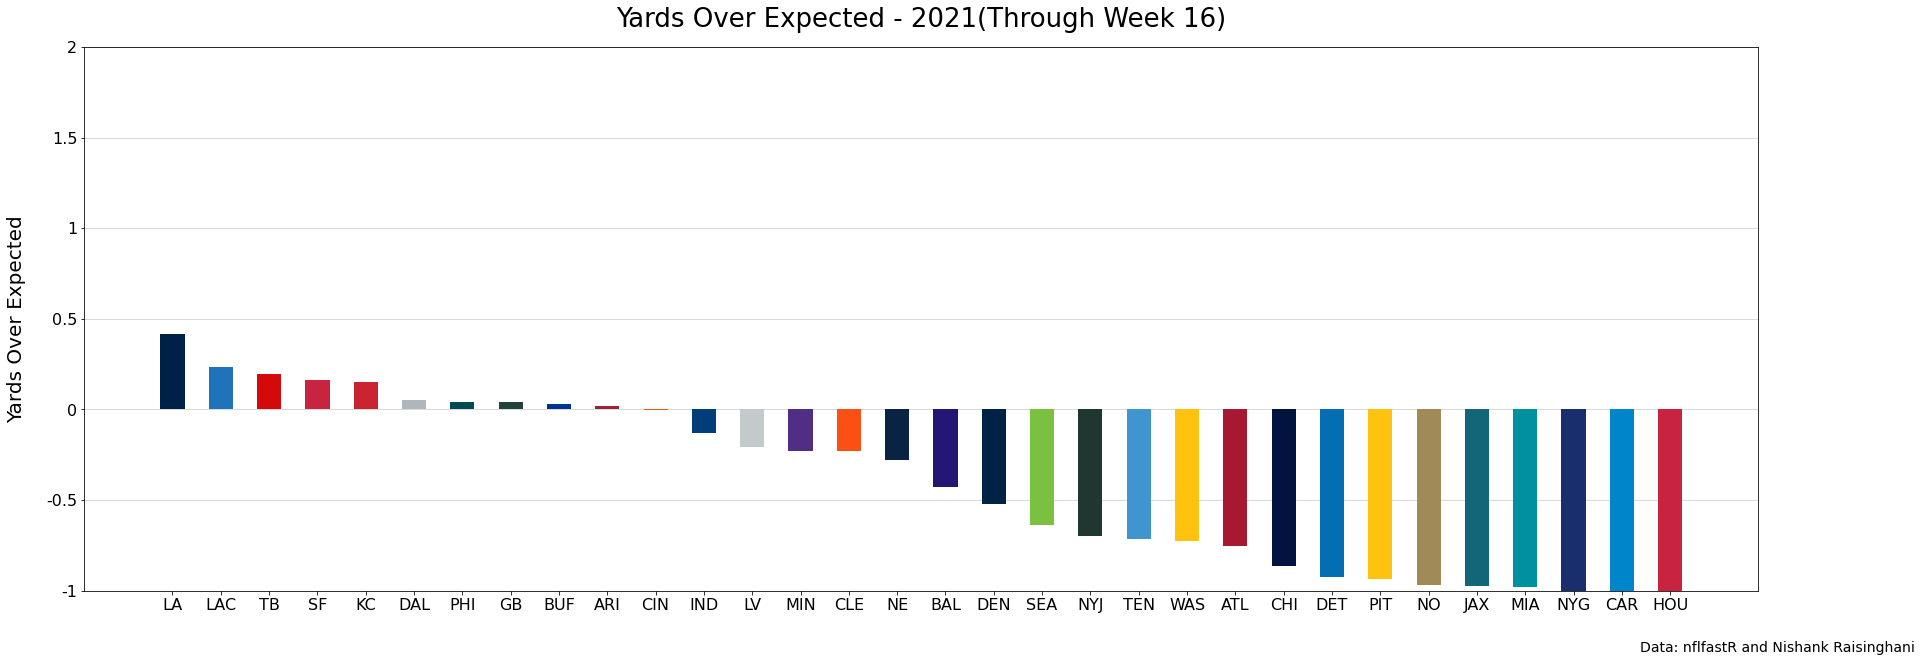

In [ ]:



#Sort highest to lowest so bar chart is left to right - high to low
epa_data1.sort_values('yards_over_expected',ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(30,10))

#Create league average line


#Add team logos


#Add bar chart, x axis is an array from 0-31 (length of 32, one per team)
ax.bar(np.arange(0,32), epa_data1['yards_over_expected'], color=epa_data1.color, width=.5)
    
#Add a grid across the y-axis
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)
ax.set_xticks(np.arange(0,32))
#Add team abbreviations as x tick labels
ax.set_xticklabels(epa_data1.index,fontsize=16)

#Start y-axis at .3 (30%) to eliminate wasted space
ax.set_ylim(-1,2)
ax.set_yticks([-1,-0.5,0,0.5,1,1.5,2])
ax.set_yticklabels([-1,-0.5,0,0.5,1,1.5,2],fontsize=16)

ax.set_ylabel('Yards Over Expected', fontsize=20, labelpad=20)
ax.set_title('Yards Over Expected - 2021(Through Week 16)', fontsize=26, pad=20)
plt.figtext(.845, .04, 'Data: nflfastR and Nishank Raisinghani', fontsize=14)


plt.savefig('neutral_pass_rates.png',dpi=300)

**Its interesting to see here that there was a clear lack of elite offenses in the NFL this season. The eventual Super Bowl Champs came in first further proving that an elite offense wins you games in today's league**